In [88]:
#import libraries
import pandas as pd
import numpy as np

In [90]:
#read and visualize data
df = pd.read_csv('movie_data.csv')
df.head(5)

,Unnamed: 0,movie_id,reviews,rating_votes,genres,first_genre,movie_rating,budget,runtime,num_actors
0,0,417741,This film has possibly the worst ending of an...,432086.0,"['Action', 'Adventure', 'Family', 'Fantasy', '...",Action,7.6,250000000.0,153.0,97.0
1,1,54357,"IMBD refused to post this in the ""Trivia"" sec...",12719.0,"['Adventure', 'Family']",Adventure,7.2,5000000.0,126.0,11.0
2,2,1300854,"Iron Man 3 (2013) is A Marvel pure, fun, popc...",713361.0,"['Action', 'Adventure', 'Sci-Fi']",Action,7.2,200000000.0,130.0,264.0
3,3,413300,As I was walking down the stairs and out of t...,472799.0,"['Action', 'Sci-Fi']",Action,6.2,258000000.0,139.0,168.0
4,4,36868,I first saw this film (one of my top ten favo...,54373.0,"['Drama', 'Romance', 'War']",Drama,8.0,2100000.0,170.0,92.0


In [61]:
df.columns

Index(['Unnamed: 0', 'movie_id', 'reviews', 'rating_votes', 'genres',
       'first_genre', 'movie_rating', 'budget', 'runtime', 'num_actors'],
      dtype='object')

In [91]:
#drop irrelevant columns
df = pd.DataFrame(df)
df = df.drop(columns=['movie_id', 'genres','Unnamed: 0'])

In [63]:
from textblob import TextBlob

In [92]:
#calculate sentiment of movie review and append it to dataframe as an additional feature
sample_reviews = df['reviews']

def detect_polarity(reviews):
    return TextBlob(reviews).sentiment.polarity

df['review_polarity'] = df.reviews.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [93]:
#drop review column
df = df.drop(columns =['reviews'])
df.head()

,rating_votes,first_genre,movie_rating,budget,runtime,num_actors,review_polarity
0,432086.0,Action,7.6,250000000.0,153.0,97.0,0.037356
1,12719.0,Adventure,7.2,5000000.0,126.0,11.0,0.288185
2,713361.0,Action,7.2,200000000.0,130.0,264.0,0.173016
3,472799.0,Action,6.2,258000000.0,139.0,168.0,0.119762
4,54373.0,Drama,8.0,2100000.0,170.0,92.0,0.276863


In [94]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [95]:
#one hot encoding for categorical data (first_genre)
df = pd.concat([df, pd.get_dummies(df['first_genre'], prefix='genre')], axis=1)

In [96]:
df.head()

,rating_votes,first_genre,movie_rating,budget,runtime,num_actors,review_polarity,genre_Action,genre_Adventure,genre_Animation,...,genre_Film-Noir,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Short,genre_Thriller,genre_Western
0,432086.0,Action,7.6,250000000.0,153.0,97.0,0.037356,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12719.0,Adventure,7.2,5000000.0,126.0,11.0,0.288185,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,713361.0,Action,7.2,200000000.0,130.0,264.0,0.173016,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,472799.0,Action,6.2,258000000.0,139.0,168.0,0.119762,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54373.0,Drama,8.0,2100000.0,170.0,92.0,0.276863,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
#drop first genre columns as we have already transform it to numerical
df = df.drop(columns =['first_genre'])

In [98]:
#normalize data
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

In [99]:
#convert normalize data to a dataframe
data_transformed = pd.DataFrame(data_transformed)

In [100]:
#import require library for clustering
from sklearn.cluster import KMeans

In [101]:
#check for NA
np.where(np.isnan(data_transformed))

(array([  85,   90,  100,  103,  111,  117,  122,  126,  141,  148,  150,
         154,  155,  162,  170,  171,  174,  175,  179,  185,  187,  199,
         205,  211,  215,  217,  227,  229,  236,  264,  265,  281,  284,
         290,  291,  294,  295,  296,  299,  301,  303,  305,  306,  307,
         308,  308,  309,  310,  314,  316,  318,  319,  320,  321,  322,
         322,  323,  324,  325,  326,  327,  328,  332,  333,  336,  338,
         341,  342,  343,  344,  348,  349,  350,  351,  352,  354,  357,
         358,  359,  361,  363,  364,  370,  374,  380,  381,  383,  385,
         386,  388,  390,  391,  393,  394,  398,  401,  402,  404,  405,
         407,  408,  409,  410,  411,  412,  417,  419,  420,  421,  423,
         426,  427,  428,  429,  431,  432,  437,  441,  443,  444,  447,
         450,  451,  453,  455,  456,  457,  459,  460,  461,  463,  465,
         466,  467,  468,  470,  472,  474,  475,  476,  477,  481,  483,
         484,  486,  490,  491,  492, 

In [102]:
#fill NA with average value
newdf = data_transformed.fillna(data_transformed.mean())

In [103]:
#calculate sum of square distances to find the optimal number of groups
Sum_Of_Squared_Distances = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(newdf)
    Sum_Of_Squared_Distances.append(km.inertia_)

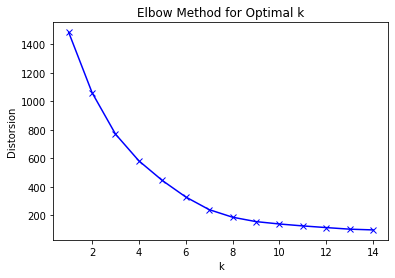

In [104]:
#from the plot we can see optimal number of groups could be around 6
plt.plot(K,Sum_Of_Squared_Distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsion')
plt.title('Elbow Method for Optimal k')
plt.show()

In [106]:
finaldf = pd.DataFrame(newdf)

In [107]:
finaldf.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.199499,0.784810,0.02500,0.347087,0.073077,0.325421,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005867,0.734177,0.00050,0.281553,0.006923,0.814905,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.329370,0.734177,0.02000,0.291262,0.201538,0.590157,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.218297,0.607595,0.02580,0.313107,0.127692,0.486235,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.025099,0.835443,0.00021,0.388350,0.069231,0.792810,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
#apply kmeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(newdf)
y_kmeans = kmeans.predict(newdf)

In [132]:
#put predictions together into a list
group = y_kmeans.tolist()

In [133]:
#reload original dataset
movies_df = pd.read_csv('movie_data.csv')

In [134]:
#append group columns to dataset
movies_df['group'] = group

In [135]:
movies_df.columns

Index(['Unnamed: 0', 'movie_id', 'reviews', 'rating_votes', 'genres',
       'first_genre', 'movie_rating', 'budget', 'runtime', 'num_actors',
       'group'],
      dtype='object')

In [136]:
columns = ['Unnamed: 0','genres']
movies_df.drop(columns, inplace=True, axis=1)

In [137]:
#final dataset with group predictions append to it
movies_df.head()

,movie_id,reviews,rating_votes,first_genre,movie_rating,budget,runtime,num_actors,group
0,417741,This film has possibly the worst ending of an...,432086.0,Action,7.6,250000000.0,153.0,97.0,2
1,54357,"IMBD refused to post this in the ""Trivia"" sec...",12719.0,Adventure,7.2,5000000.0,126.0,11.0,5
2,1300854,"Iron Man 3 (2013) is A Marvel pure, fun, popc...",713361.0,Action,7.2,200000000.0,130.0,264.0,2
3,413300,As I was walking down the stairs and out of t...,472799.0,Action,6.2,258000000.0,139.0,168.0,2
4,36868,I first saw this film (one of my top ten favo...,54373.0,Drama,8.0,2100000.0,170.0,92.0,1
